# Special Types
Here we go through 2 types of special time series:
* White Noise
* Random Walk

and 2 features that present in time series data: 
* stationality
* seasonality    

In the end we introduced **autocorrelation** and **partial autocorrelation**

In [1]:
#load libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
#import data
df_train = pd.read_csv('df_train.csv')
df_train['date'] = pd.to_datetime(df_train['date'],dayfirst = True)
df_train.set_index('date',inplace = True)
df_train = df_train.asfreq('b')

## 1. White Noise
* A special type of time-series, where the data doesn't follow a pattern
* Constant mean, constant variance and no auto-correlation

* Auto correlation: how a series correlates to the past versions of itself $\rho =corr(x_t, x_{t-1})$
               

In [3]:
#create an array with data from a normal distribution
wn = np.random.normal(loc = df_train.mean(),scale = df_train.std(), size = len(df_train))
df_train['wn'] = wn
df_train.describe()

,market_value,wn
count,5021.000000,5021.000000
mean,1091.651926,1093.967496
std,292.559287,296.146951
min,438.920000,-81.948943
25%,914.620000,896.356340
50%,1144.650000,1089.116219
75%,1316.280729,1293.073245
max,1570.252238,2214.830295


Text(0.5, 1.0, 'white noise time series')

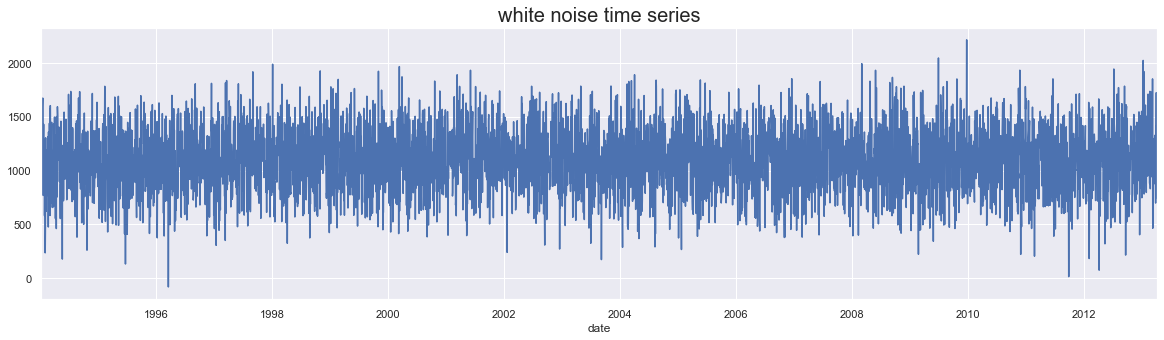

In [4]:
df_train.wn.plot(figsize = (20,5))
plt.title('white noise time series',size =20)

Text(0.5, 1.0, 'S&P Prices')

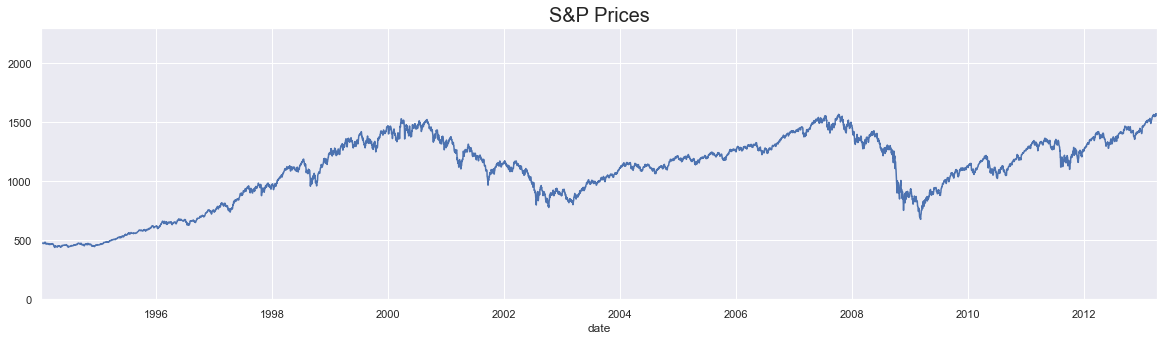

In [5]:
df_train['market_value'].plot(figsize = (20,5))
plt.ylim(0,2300)
plt.title('S&P Prices',size =20)

Here we see the difference between white noise and actual stock data, which is a time series

## 2. Random Walk
A special type of time-series, where values tend to presist over time and the differences between periods are simply white noise. For price P and some white noise residual $\epsilon$, we have:

$$P_t = P_{t-1} + \epsilon_t $$

In [6]:
#load random walk data
rw = pd.read_csv('RandWalk.csv')

In [7]:
#data preprocessing
rw['date'] = pd.to_datetime(rw['date'],dayfirst = True)
rw.set_index('date',inplace = True)
rw = rw.asfreq('b')

In [8]:
rw.head()

,price
date,
1994-01-07,1122.139662
1994-01-10,1080.347860
1994-01-11,1082.095245
1994-01-12,1083.639265
1994-01-13,1067.146255


In [9]:
df_train['rw'] = rw['price']

In [10]:
df_train.head()

,market_value,wn,rw
date,,,
1994-01-07,469.90,793.845703,1122.139662
1994-01-10,475.27,847.992985,1080.347860
1994-01-11,474.13,1175.178819,1082.095245
1994-01-12,474.17,1025.175193,1083.639265
1994-01-13,472.47,1049.595429,1067.146255


Text(0.5, 1.0, 'Random Walk Plot vs. S&P 500')

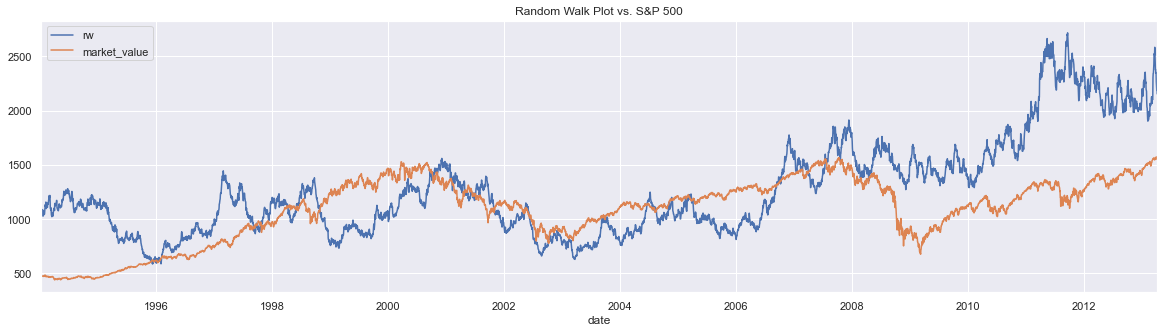

In [16]:
#plot rw data 
df_train['rw'].plot(figsize = (20,5))
df_train['market_value'].plot()
plt.legend(loc = 'upper left')
plt.title('Random Walk Plot vs. S&P 500')

**Market efficiency**: Measures the level of difficulty in the foecasting of correct future values

If market price resembles a random walk, then the future price can't be predicted with accuracy.    
If it can be predicted with accuracy, theen there is arbitrage oppportunity.

## 3. Stationarity
* **Covariance stationarity**: Constant mean, variance and co-variance ( $Cov(x_n,x_{n+k}) = Cov(x_m,x_{m+k}$)

An obvious example for covariance stationarity is **white noise**

* **Strict Stationarity**: Samples of identical size should have identical distributions (rarely observed in real world)

### Determine weak form of stationarity
* **Dickey-Fuller test**:
    * H0: stationary process, $\phi < 1$
    * H1: non-stationary process,$\phi = 1$

In [22]:
import statsmodels.graphics.tsaplots as sgt
import statsmodels.tsa.stattools as sts
from statsmodels.tsa.seasonal import seasonal_decompose

In [24]:
#run dickey fuller test on SP500
sts.adfuller(df_train['market_value'])

(-1.736984745235244,
 0.41216456967706194,
 18,
 5002,
 {'1%': -3.431658008603046,
  '5%': -2.862117998412982,
  '10%': -2.567077669247375},
 39904.880607487445)

### Explaining the Output
* Fist line:  -1.73698474523524 is the **test statistics**

* Second line: **p-value** associated with t statistics (ca. 40% chance of not rejecting H0)
* Third line: **Number of lags** used in the t-statistics
* forth line: **Number of observations** used for the DF regression and calculation of the critical values  

* The 1%, 5%, 10% values are from the **dickey-fuller table**. We can potentially use any of them as 'level of significance' for our analysis (to compare with our test statistics)

* last line: the **maximised information certieria** if autolag is not null. The lower the value, the easier it is to make predictions for the future.

In [25]:
sts.adfuller(df_train['wn'])

(-51.14662601529599,
 0.0,
 1,
 5019,
 {'1%': -3.4316535759402753,
  '5%': -2.8621160400844468,
  '10%': -2.567076626752987},
 70920.20408683967)

In [26]:
sts.adfuller(df_train['rw'])

(-1.3286073927689708,
 0.6159849181617388,
 24,
 4996,
 {'1%': -3.4316595802782865,
  '5%': -2.8621186927706463,
  '10%': -2.567078038881065},
 46299.333497595144)

Here we see a p-value of 0.61, hence we don't have significant evidence to reject H0.  Instead, there is a 60% chance that the data is from a non-stationary process

## 4. Seasonality
Certain trends will appear on a cyclical basis
* Decomposition
    * Trend: Pattern
    * Seasonal: Cyclical effects
    * Residual: Error of preditction
    
* **Naive Decomposition**: Linear relationship between the three parts
    * Additive: Obsevation = Trend + Seasonal + Residual
    * Multiplicative: Observation = Trend x Seasonal x Residual

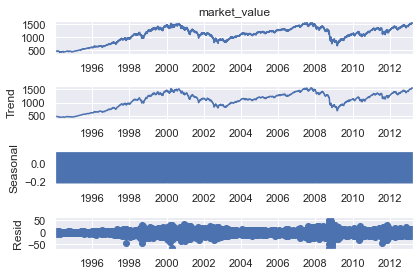

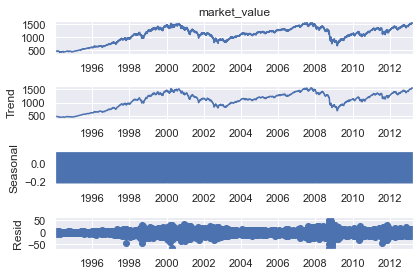

In [29]:
#plot additive seasonality
s_dec_additive = seasonal_decompose(df_train['market_value'], model = 'addiitive')
s_dec_additive.plot()

* This time trend correctly reproduced market_value since the model uses the previous period values as trend setter. However, if we observe seasonal parttern, then we'd better off with some other data for better prediction

* The trend part explains most of the variability in the data

* **Seasonal Data** looks like a rectangle, this is because the data constantly oscillating back and forth and the figure size is too small. i.e. no concrete cylclical pattern

* **Residuals**: Error of our model. Greatest at 2000 and 2008, which can be explained by the financial crisis. 

* Overall, it suggests no seasonality

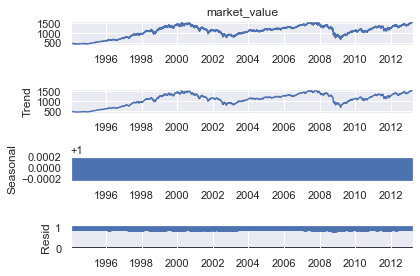

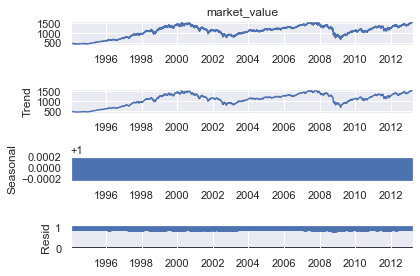

In [34]:
#plot multiplicative seasonality
s_dec_additive = seasonal_decompose(df_train['market_value'], model = 'multiplicative')
s_dec_additive.plot()

The two plots are very similar. We can therefore conclude there is no seasonality in S%P Pricess

## 5. Correlation between past and present values
* **Autocorrelation**:the correlation between a sequence and itself. 

We often compare a time series with its lags   

* ACF computes the autocorrelation with as many lags as we are interested 

Text(0.5, 1.0, 'ACF S&P')

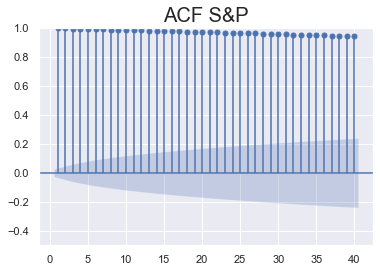

In [37]:
#zero indicate wehther we include current period in the graph
sgt.plot_acf(df_train['market_value'], lags = 40, zero = False)
plt.ylim(-0.5,1)
plt.title('ACF S&P', size = 20)

* y axis shows (auto)correlation coefficient

* blue areas suggest significance. This area expend as lag values increase.

* The greater the distance in time, the more unlikely that autocorrelation presists

* all data points are above the blue region suggests the coefficients are significant - an indicator for autocorrelation

Text(0.5, 1.0, 'ACF White Noise')

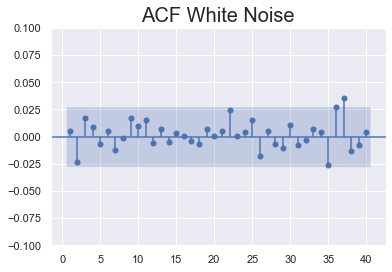

In [40]:
sgt.plot_acf(df_train['wn'], lags = 40, zero = False)
plt.ylim(-0.1,0.1)
plt.title('ACF White Noise', size = 20)

Here all the lines fall within the blue area - coefficients are not significant across the entire plot - suggest no autocorrelation

## 6. Partial Autocorrelation Function (PACF)

Text(0.5, 1.0, 'PACF S&P')

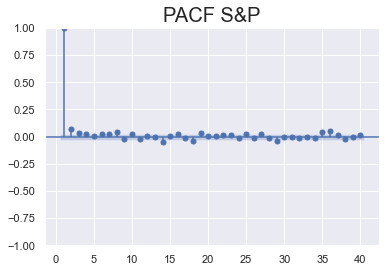

In [45]:
sgt.plot_pacf(df_train['market_value'], lags = 40, zero = False, method = ('ols'))
plt.title('PACF S&P', size = 20)

* Only the first few points are significantly higher than 0.Since the rest points are very close to 0 we can say that their nummerical values are not that important (i.e. being positive or negative is somewhat random without lasting effects)


* This is because PACF cancels out all additional channels a previous period value affects the present one.

Text(0.5, 1.0, 'PACF White NOise')

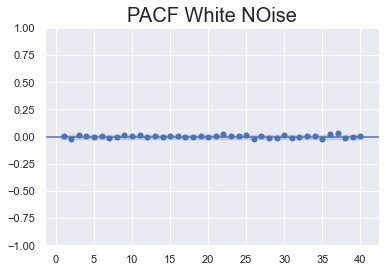

In [46]:
sgt.plot_pacf(df_train['wn'], lags = 40, zero = False, method = ('ols'))
plt.title('PACF White NOise', size = 20)

There exists no auto-correlation in white noise